In [1]:
#Aplicação do algoritmo Ramdom Forest
#Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Carregamento do banco de dados
arquivo = pd.read_csv('C:/UCPEL/IA-ML/EEG_Eye_State_Classification.csv')

In [3]:
#Visualização do conjunto de dados
arquivo.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
#Visualização do final do conjunto de dados
arquivo.tail()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1
14979,4287.69,3997.44,4260.00,4121.03,4333.33,4616.41,4088.72,4638.46,4212.31,4226.67,4167.69,4274.36,4597.95,4350.77,1


In [5]:
#Visualização do tamanho do banco de dados
arquivo.shape

(14980, 15)

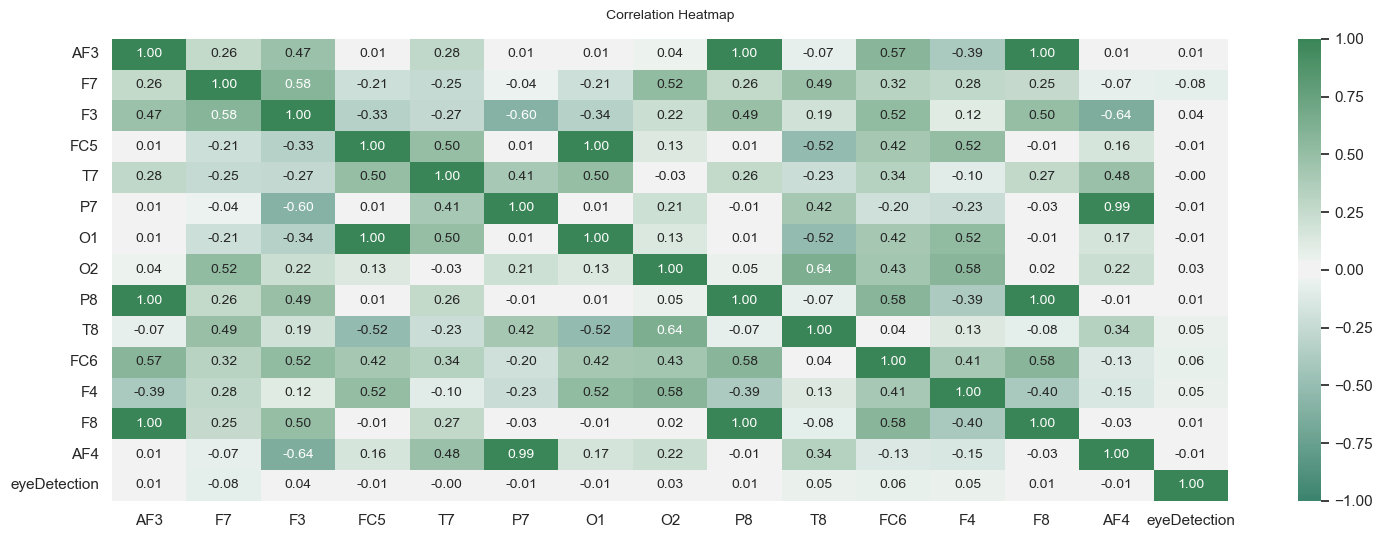

In [6]:
#Gerando Matriz de correlação (Biblioteca Seaborn), com os dados de correlação nas células
sns.set(font_scale=1)
plt.figure (figsize = (18, 6))
cmap = sns.diverging_palette(160, 140, sep=10, as_cmap=True)
heatmap = sns.heatmap(arquivo.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1,fmt=".2f", annot_kws={'size':10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=14);

In [7]:
#Separação das variáveis preditoras (características) e da variável-alvo (desfecho)
y = arquivo['eyeDetection']
x = arquivo.drop('eyeDetection', axis = 1)

In [8]:
#Criação dos conjuntos de treino e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [9]:
#Quantidade de dados para treino
x_treino.shape

(10486, 14)

In [10]:
#Quantidade de dados para teste
x_teste.shape

(4494, 14)

In [11]:
#Criação do modelo
for i in range(100):
    modelo = RandomForestClassifier()
    modelo.fit(x_treino, y_treino)
    
    #Imprimindo resultados
    resultado = modelo.score(x_teste, y_teste)
    print("Acurácia", resultado)

Acurácia 0.9256786826880284
Acurácia 0.9230084557187361
Acurácia 0.9256786826880284
Acurácia 0.9227859368046284
Acurácia 0.9232309746328438
Acurácia 0.9187805963506898
Acurácia 0.9230084557187361
Acurácia 0.9259012016021362
Acurácia 0.9230084557187361
Acurácia 0.9247886070315977
Acurácia 0.9216733422340899
Acurácia 0.9227859368046284
Acurácia 0.9227859368046284
Acurácia 0.92456608811749
Acurácia 0.9216733422340899
Acurácia 0.9216733422340899
Acurácia 0.9232309746328438
Acurácia 0.9265687583444593
Acurácia 0.9270137961726747
Acurácia 0.922340898976413
Acurácia 0.9252336448598131
Acurácia 0.9218958611481975
Acurácia 0.9250111259457053
Acurácia 0.9234534935469515
Acurácia 0.9241210502892746
Acurácia 0.9205607476635514
Acurácia 0.9238985313751669
Acurácia 0.9252336448598131
Acurácia 0.9227859368046284
Acurácia 0.9210057854917668
Acurácia 0.9183355585224744
Acurácia 0.922340898976413
Acurácia 0.9259012016021362
Acurácia 0.9254561637739208
Acurácia 0.9221183800623053
Acurácia 0.9221183800623

In [12]:
#Determinando a acurácia na amostra de treino
score_treino = modelo.score(x_treino, y_treino)
score_treino

1.0

In [13]:
#Realizando previsão na amostra de teste
y_previsto = modelo.predict(x_teste)
score_teste = modelo.score(x_teste, y_teste)
score_teste

0.9265687583444593

In [14]:
#Gerando Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsto)
cm

array([[2324,   97],
       [ 233, 1840]], dtype=int64)

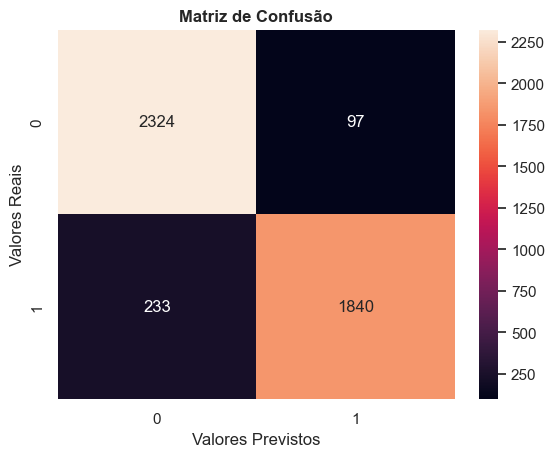

In [15]:
#Mapa de calor da Matriz de Confusão
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusão', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()